In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
tweets = pd.read_csv('data/needed/cleaned/Tweets.csv')
stocks = pd.read_csv('data/needed/cleaned/Stock.csv')

In [48]:
tweets["date"] = pd.to_datetime(tweets["date"])
stocks["date"] = pd.to_datetime(stocks["date"])

tweets["month"] = tweets["date"].dt.to_period('M')
stocks["month"] = stocks["date"].dt.to_period('M')

In [49]:
#add missing months to tweets DF (months with 0 tweets)
missing_months = pd.date_range("2010-07", "2011-11", freq="M")

data = []
for i in missing_months:
    i = i.to_period(freq = "M")
    data.append(i)

new_df = pd.DataFrame(data, columns=["month"])
tweets = tweets.append(new_df)
tweets = tweets.sort_values(by=['month'], ascending=False)
tweets["id"] = tweets["id"].fillna(0)

In [50]:
monthly_tweets = tweets.groupby(["month"])
monthly_stocks = stocks.groupby(["month"])

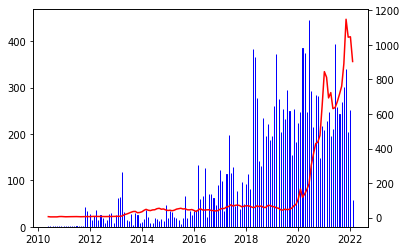

In [51]:
y1 = monthly_tweets.count() #ignore the last month bcs we dont have all the data
y2 = monthly_stocks.mean()[:-1]
x = pd.to_datetime(pd.date_range(tweets["date"].min(), tweets["date"].max(), freq="M").strftime("%Y-%m"))

plt.figure()
plt.bar(x, y1["id"], ec='blue') #without edgecolor(ec) some bars not visible
axes2 = plt.twinx()
axes2.plot(x, y2["high"], color = "red")

*Mentions of Tesla*

In [57]:
values = {"tweet": ""}
tweets_lower = tweets.fillna(value=values)
tweets_lower["tweet"] = tweets_lower["tweet"].str.lower()
tweets_lower["tsla1"] = [1 if is_in else 0 for is_in in tweets_lower["tweet"].str.contains("tesla ")]
tweets_lower["tsla2"] = [1 if is_in else 0 for is_in in tweets_lower["tweet"].str.contains("tesla")]

monthly_lower = tweets_lower.groupby(["month"]).sum()

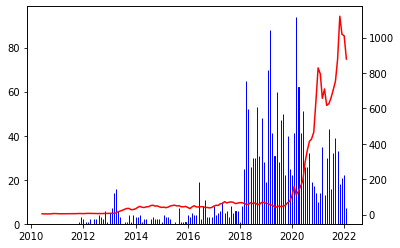

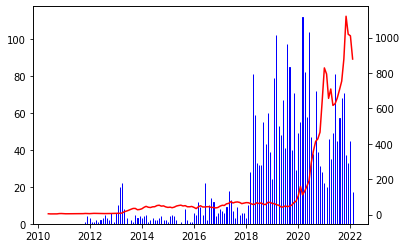

In [60]:
x = pd.to_datetime(pd.date_range(stocks["date"].min(), stocks["date"].max(), freq="M").strftime("%Y-%m"))

y1_1 = monthly_lower["tsla1"]
y1_2 = monthly_lower["tsla2"]
y2 = monthly_stocks.mean()[:-1]

plt.figure()
plt.bar(x, y1_1, ec='blue') #without edgecolor(ec) some bars not visible
axes2 = plt.twinx()
axes2.plot(x, y2["close"], color = "red")
plt.show()

plt.figure()
plt.bar(x, y1_2, ec='blue') #without edgecolor(ec) some bars not visible
axes2 = plt.twinx()
axes2.plot(x, y2["close"], color = "red")
plt.show()

Text(0, 0.5, 'price')

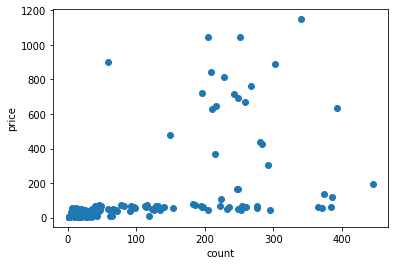

In [16]:
plt.scatter(y1["id"], y2["high"])
plt.xlabel("count")
plt.ylabel("price")

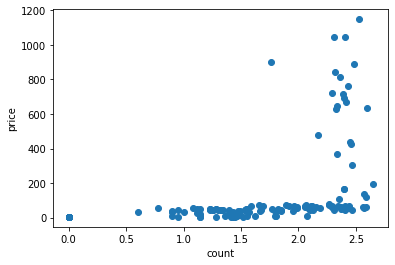

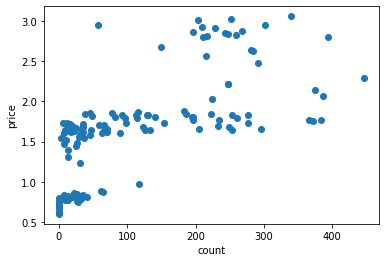

Text(0, 0.5, 'price')

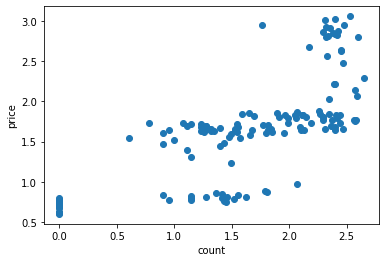

In [19]:
plt.scatter(np.log10(y1["id"]), y2["high"])
plt.xlabel("count")
plt.ylabel("price")
plt.show()

plt.scatter(y1["id"], np.log10(y2["high"]))
plt.xlabel("count")
plt.ylabel("price")
plt.show()

plt.scatter(np.log10(y1["id"]), np.log10(y2["high"]))
plt.xlabel("count")
plt.ylabel("price")

--> Groups !??

In [26]:
# counts all words in all the tweets !!tesla and @tesla at the moment 2 diff words --> add @ to symbols to ignore!!
tweets_text = tweets["tweet"]
tweets_text = tweets_text.dropna()
tweets_text = tweets_text.to_list()
tweets_text = " ".join(tweets_text)
tweets_text = tweets_text.lower()

#symbols to ignore
for i in [",", ".", '”', "“", "(", ")", "!", "?", ":", ";", "[", "]", "*"]:
    tweets_text = tweets_text.replace(i, "")
tweets_text = tweets_text.replace("/", " ")

tweets_text = tweets_text.split(" ")

In [27]:
x = []
y = []

for i in tweets_text:
    if i in x:
        y[x.index(i)] += 1
    else:
        x.append(i)
        y.append(1)

word_count = pd.DataFrame(data={"word":x, "count":y})
word_count = word_count.sort_values(by=["count"], ascending=False)
word_count.to_csv('word_count.csv', index=False)

OTHER PLOTS

In [22]:
tweets["date"] = tweets["date"].dt.date
stocks["date"] = stocks["date"].dt.date
together = pd.merge(tweets, stocks, on = ["date"])#tweets.append(stocks)

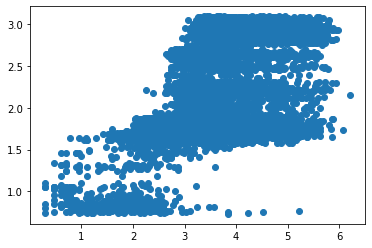

In [25]:
plt.scatter(np.log10(together["nlikes"]), np.log10(together["high"]))

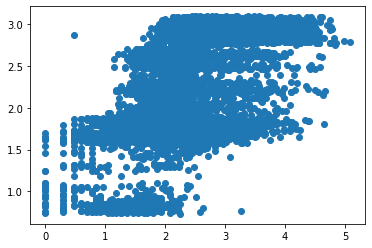

In [27]:
plt.scatter(np.log10(together["nreplies"]), np.log10(together["high"]))

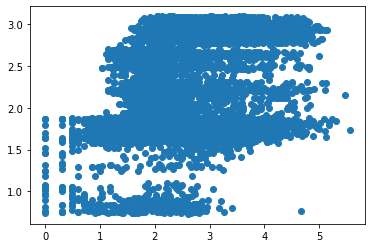

In [28]:
plt.scatter(np.log10(together["nretweets"]), np.log10(together["high"]))

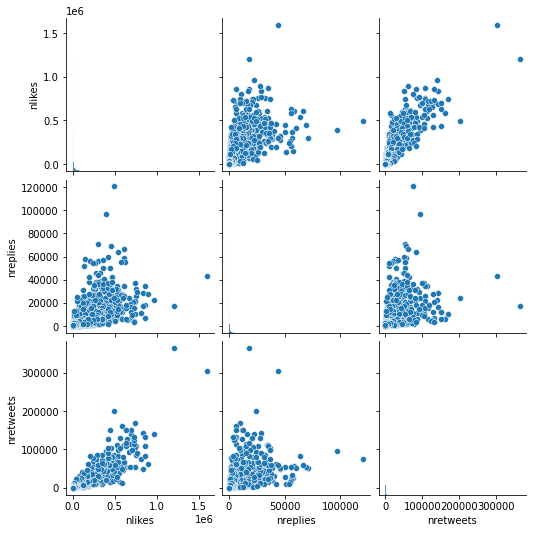

In [30]:
sns.pairplot(tweets[["nlikes", "nreplies", "nretweets"]])